# Bussiness Case

#### Introduction:
ABC Tech, a well-established mid-size organization operating in the IT-enabled business segment for over a decade, has successfully implemented ITIL (Information Technology Infrastructure Library) practices, including incident management, problem management, change management, and configuration management. However, recent challenges have arisen, primarily focusing on the need for improvement in incident management processes.

#### Current Scenario:
ABC Tech handles an average of 22-25k IT incidents/tickets annually, managed according to the best practices of the ITIL framework. Despite matured process levels, a recent audit has indicated that further improvement initiatives may not yield a sufficient return on investment. Customer survey results have indicated a poor rating for incident management.

#### Machine Learning as a Solution:
Inspired by insights gained from a Machine Learning conference focusing on Machine Learning for IT Service Management (ITSM), ABC Tech's management is considering the implementation of machine learning to address the challenges in their incident management processes.

# Domain analysis

* **CI_Name :** Represents the unique name of the configuration item linked to the incident, providing context for incident analysis and resolution within ABC Tech's IT infrastructure.

* **CI_Cat:** Specifies the category of the configuration item, aiding in the classification of IT assets for effective incident prioritization and resolution.

* **CI_Subcat:** Indicates the subcategory of the configuration item, particularly for web-based applications, enhancing granularity in incident classification and handling.

* **WBS:** Captures the Work Breakdown Structure associated with the incident, offering insights into organizational structures and incident distribution across components.

* **Incident_ID:** A unique identifier for each incident, facilitating distinct identification and retrieval of incident records for comprehensive analysis.

* **Status:** Denotes the current status of the incident (e.g., Closed), tracking the incident lifecycle and resolution efficiency.

* **Impact, Urgency, Priority:** Quantifies the incident's impact, urgency, and priority, aiding in efficient resource allocation and resolution based on severity.

* **number_cnt:** Contains continuous numeric values, likely representing a count or measurement within a range between 0 and 1. Potentially used for tracking or referencing specific attributes in the IT service delivery system with a level of granularity

* **Category:** Specifies the category of the incident (e.g., hardware, software), enabling targeted analysis and resolution strategies for different types of incidents.

* **KB_number:** Refers to the Knowledge Base number associated with the incident, indicating the availability of documented resolutions in the knowledge base.

* **Alert_Status:** Represents the status of alerts associated with the incident, signaling critical issues and aiding in proactive problem resolution.

* **No_of_Reassignments:** Counts the number of times the incident has been reassigned, providing insights into initial assignment efficiency and recurring issues.

* **Open_Time, Reopen_Time, Resolved_Time, Close_Time:** Timestamps indicating when the incident was opened, reopened, resolved, and closed, aiding in resolution time analysis.

* **Handle_Time_hrs:** Represents the total handling time for the incident in hours, measuring the efficiency of incident handling processes.

* **Closure_Code:** Indicates the closure code associated with the incident, categorizing reasons for closure and contributing to trend analysis.

* **No_of_Related_Interactions, Related_Interaction:** Captures the number and details of related interactions, offering context for incident resolution.

* **No_of_Related_Incidents, No_of_Related_Changes, Related_Change:** Tracks the number of related incidents and changes, along with details about related changes, aiding in comprehensive incident and change impact analysis.

In [1]:
# importing the basic libraries
import os
import mysql.connector
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
pip install mysql-connector

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pymysql

Note: you may need to restart the kernel to use updated packages.


In [2]:
# creating the connection with the dataset
connection = mysql.connector.connect(host='18.136.157.135',

                                    user='dm_team',

                                    password='DM!$Team@&27920!',

                                    database="project_itsm")

In [3]:
# loading the database
cursor = connection.cursor()
cursor.execute('show databases')
for i in cursor:
    print(i)

('information_schema',)
('project_itsm',)


In [4]:
# loading the tables in database 
query ='show tables'
df_tables =pd.read_sql_query(query,connection)
df_tables

,Tables_in_project_itsm
0,dataset_list


In [5]:
query = 'select * from dataset_list'
df = pd.read_sql_query(query,connection)


In [6]:
query = 'select * from dataset_list'

In [7]:
df

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4,0.601292279,...,,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1,SD0000007,2,,
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3,0.415049969,...,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1,SD0000011,1,,
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NA,0.517551335,...,,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1,SD0000017,,,
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4,0.642927218,...,,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1,SD0000025,,,
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4,0.345258343,...,,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1,SD0000029,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46601,SBA000464,application,Server Based Application,WBS000073,IM0047053,Closed,4,4,4,0.23189604,...,,31-03-2014 16:29,31-03-2014 16:29,"0,095",Other,1,SD0147021,,,
46602,SBA000461,application,Server Based Application,WBS000073,IM0047054,Closed,4,4,4,0.805153085,...,,31-03-2014 15:29,31-03-2014 15:29,"0,428333333",User error,1,SD0146967,,,
46603,LAP000019,computer,Laptop,WBS000091,IM0047055,Closed,5,5,5,0.917466294,...,,31-03-2014 15:32,31-03-2014 15:32,"0,071666667",Hardware,1,SD0146982,,,
46604,WBA000058,application,Web Based Application,WBS000073,IM0047056,Closed,4,4,4,0.701278158,...,,31-03-2014 15:42,31-03-2014 15:42,"0,116944444",Software,1,SD0146986,,,


# Basic checks 

In [8]:
# getting all the columns
pd.set_option('display.max_columns',None)

In [9]:
# checking the top 5 rows
df.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4,0.601292279,incident,KM0000553,closed,26,05-02-2012 13:32,,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1,SD0000007,2,,
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3,0.415049969,incident,KM0000611,closed,33,12-03-2012 15:44,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1,SD0000011,1,,
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NA,0.517551335,request for information,KM0000339,closed,3,29-03-2012 12:36,,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1,SD0000017,,,
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4,0.642927218,incident,KM0000611,closed,13,17-07-2012 11:49,,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1,SD0000025,,,
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4,0.345258343,incident,KM0000611,closed,2,10-08-2012 11:01,,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1,SD0000029,,,


In [10]:
# checking the bottom 5 rows
df.tail()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
46601,SBA000464,application,Server Based Application,WBS000073,IM0047053,Closed,4,4,4,0.23189604,incident,KM0001314,closed,0,31-03-2014 16:23,,31-03-2014 16:29,31-03-2014 16:29,"0,095",Other,1,SD0147021,,,
46602,SBA000461,application,Server Based Application,WBS000073,IM0047054,Closed,4,4,4,0.805153085,incident,KM0002360,closed,0,31-03-2014 15:03,,31-03-2014 15:29,31-03-2014 15:29,"0,428333333",User error,1,SD0146967,,,
46603,LAP000019,computer,Laptop,WBS000091,IM0047055,Closed,5,5,5,0.917466294,incident,KM0000315,closed,0,31-03-2014 15:28,,31-03-2014 15:32,31-03-2014 15:32,"0,071666667",Hardware,1,SD0146982,,,
46604,WBA000058,application,Web Based Application,WBS000073,IM0047056,Closed,4,4,4,0.701278158,incident,KM0001287,closed,0,31-03-2014 15:35,,31-03-2014 15:42,31-03-2014 15:42,"0,116944444",Software,1,SD0146986,,,
46605,DCE000077,hardware,DataCenterEquipment,WBS000267,IM0047057,Closed,3,3,3,0.902319509,incident,KM0000182,closed,0,31-03-2014 17:24,,31-03-2014 22:47,31-03-2014 22:47,"0,586388889",Hardware,1,SD0147088,,,


In [11]:
# checking the number of unique values in each feature
df.nunique()

CI_Name                        3019
CI_Cat                           13
CI_Subcat                        65
WBS                             274
Incident_ID                   46606
Status                            2
Impact                            6
Urgency                           6
Priority                          6
number_cnt                    46606
Category                          4
KB_number                      1825
Alert_Status                      1
No_of_Reassignments              42
Open_Time                     34636
Reopen_Time                    2245
Resolved_Time                 33628
Close_Time                    34528
Handle_Time_hrs               30639
Closure_Code                     15
No_of_Related_Interactions       50
Related_Interaction           43060
No_of_Related_Incidents          25
No_of_Related_Changes             5
Related_Change                  233
dtype: int64

In [12]:
# checking the basic information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   CI_Name                     46606 non-null  object
 1   CI_Cat                      46606 non-null  object
 2   CI_Subcat                   46606 non-null  object
 3   WBS                         46606 non-null  object
 4   Incident_ID                 46606 non-null  object
 5   Status                      46606 non-null  object
 6   Impact                      46606 non-null  object
 7   Urgency                     46606 non-null  object
 8   Priority                    46606 non-null  object
 9   number_cnt                  46606 non-null  object
 10  Category                    46606 non-null  object
 11  KB_number                   46606 non-null  object
 12  Alert_Status                46606 non-null  object
 13  No_of_Reassignments         46606 non-null  ob

In [13]:
df.CI_Subcat.unique()

array(['Web Based Application', 'Desktop Application',
       'Server Based Application', 'SAP', 'Client Based Application',
       'Citrix', 'Standard Application', 'Windows Server', 'Laptop',
       'Linux Server', '', 'Monitor', 'Automation Software', 'SAN',
       'Banking Device', 'Desktop', 'Database', 'Oracle Server',
       'Keyboard', 'Printer', 'Exchange', 'System Software', 'VDI',
       'Encryption', 'Omgeving', 'MigratieDummy', 'Scanner', 'Controller',
       'DataCenterEquipment', 'KVM Switches', 'Switch',
       'Database Software', 'Network Component', 'Unix Server', 'Lines',
       'ESX Cluster', 'zOS Server', 'SharePoint Farm', 'NonStop Server',
       'Application Server', 'Security Software', 'Thin Client',
       'zOS Cluster', 'Router', 'VMWare', 'Net Device', 'Neoview Server',
       'MQ Queue Manager', 'UPS', 'Number', 'Iptelephony',
       'Windows Server in extern beheer', 'Modem', 'X86 Server',
       'ESX Server', 'Virtual Tape Server', 'IPtelephony',
      

#### observation :
- the null values in the data are represented as ('') symbol 
- in data cleaning we handle the corrupted datas

In [14]:
# making  a copy of the given data
data = df.copy()

In [15]:
# iterating throught the data and replacing the ' ' with 'nan'
for i in data:
    data[i]=data[i].replace('',np.nan)

In [16]:
# checking the basic info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   CI_Name                     46606 non-null  object
 1   CI_Cat                      46495 non-null  object
 2   CI_Subcat                   46495 non-null  object
 3   WBS                         46606 non-null  object
 4   Incident_ID                 46606 non-null  object
 5   Status                      46606 non-null  object
 6   Impact                      46606 non-null  object
 7   Urgency                     46606 non-null  object
 8   Priority                    46606 non-null  object
 9   number_cnt                  46606 non-null  object
 10  Category                    46606 non-null  object
 11  KB_number                   46606 non-null  object
 12  Alert_Status                46606 non-null  object
 13  No_of_Reassignments         46605 non-null  ob

In [17]:
# checking the duplicate values of the data
data.duplicated().sum()

0

- no duplicated values is seen in the dataset

In [18]:
# cheking the duplicated feature in the data
from fast_ml.feature_selection import get_duplicate_features

get_duplicate_features(data)

,Desc,feature1,feature2
0,Duplicate Index,Incident_ID,number_cnt


- we see that is a duplicate feature so we will eliminate any of those feature 

In [19]:
# droping the Incident_ID 
data.drop('Incident_ID',axis = 1,inplace = True)

In [20]:
data

,CI_Name,CI_Cat,CI_Subcat,WBS,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,Closed,4,4,4,0.601292279,incident,KM0000553,closed,26,05-02-2012 13:32,NaN,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1,SD0000007,2,NaN,NaN
1,WBA000124,application,Web Based Application,WBS000088,Closed,3,3,3,0.415049969,incident,KM0000611,closed,33,12-03-2012 15:44,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1,SD0000011,1,NaN,NaN
2,DTA000024,application,Desktop Application,WBS000092,Closed,NS,3,NA,0.517551335,request for information,KM0000339,closed,3,29-03-2012 12:36,NaN,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1,SD0000017,NaN,NaN,NaN
3,WBA000124,application,Web Based Application,WBS000088,Closed,4,4,4,0.642927218,incident,KM0000611,closed,13,17-07-2012 11:49,NaN,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1,SD0000025,NaN,NaN,NaN
4,WBA000124,application,Web Based Application,WBS000088,Closed,4,4,4,0.345258343,incident,KM0000611,closed,2,10-08-2012 11:01,NaN,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1,SD0000029,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46601,SBA000464,application,Server Based Application,WBS000073,Closed,4,4,4,0.23189604,incident,KM0001314,closed,0,31-03-2014 16:23,NaN,31-03-2014 16:29,31-03-2014 16:29,"0,095",Other,1,SD0147021,NaN,NaN,NaN
46602,SBA000461,application,Server Based Application,WBS000073,Closed,4,4,4,0.805153085,incident,KM0002360,closed,0,31-03-2014 15:03,NaN,31-03-2014 15:29,31-03-2014 15:29,"0,428333333",User error,1,SD0146967,NaN,NaN,NaN
46603,LAP000019,computer,Laptop,WBS000091,Closed,5,5,5,0.917466294,incident,KM0000315,closed,0,31-03-2014 15:28,NaN,31-03-2014 15:32,31-03-2014 15:32,"0,071666667",Hardware,1,SD0146982,NaN,NaN,NaN
46604,WBA000058,application,Web Based Application,WBS000073,Closed,4,4,4,0.701278158,incident,KM0001287,closed,0,31-03-2014 15:35,NaN,31-03-2014 15:42,31-03-2014 15:42,"0,116944444",Software,1,SD0146986,NaN,NaN,NaN


In [21]:
# checking the statstical information of the data
data.describe()

,CI_Name,CI_Cat,CI_Subcat,WBS,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
count,46606,46495,46495,46606,46606,46606,46606,46606,46606,46606,46606,46606,46605,46606,2284,44826,46606,46605,46146,46492,46606,1222,560,560
unique,3019,12,64,274,2,6,6,6,46606,4,1825,1,41,34636,2244,33627,34528,30638,14,49,43060,24,4,232
top,SUB000456,application,Server Based Application,WBS000073,Closed,4,4,4,0.601292279,incident,KM0001106,closed,0,24-03-2014 08:54,29-10-2013 15:03,10-10-2013 12:53,02-10-2013 15:20,0,Other,1,#MULTIVALUE,1,1,C00003013
freq,3050,32900,18811,13342,46597,22556,22588,22717,1,37748,1106,46606,27468,7,2,7,21,236,16470,43058,3434,1057,536,110


# General Overview
Total Records: 46,606 incidents are recorded in the dataset.
Categories and Subcategories

## Configuration Items (CI)
There are 3,019 unique Configuration Items (CI_Name).
Most frequent CI_Name is "SUB000456" with 3,050 occurrences.
There are 12 unique CI categories (CI_Cat) and 64 unique subcategories (CI_Subcat).
The most frequent category is "application" with "Server Based Application" being the most common subcategory.
Status, Impact, Urgency, and Priority
## Status:
There are 2 unique status values, with "Closed" being the most frequent (46,597 times).
## Impact:
There are 6 unique impact values. The most common impact value is "4", appearing 22,556 times.
## Urgency:
There are 6 unique urgency values. The most common urgency value is "4", appearing 22,588 times.
## Priority:
There are 6 unique priority values. The most common priority value is "4", appearing 22,717 times.
Incident Specifics
number_cnt: There are 46,606 unique incident numbers.
## Category:
There are 4 unique categories, with "incident" being the most common (37,748 times).
## KB_number:
There are 1,825 unique knowledge base numbers, with "KM0001106" being the most frequent (1,106 times).
## Alert_Status:
There is 1 unique alert status, which is "closed".
## Reassignments and Related Items
No_of_Reassignments: There are 41 unique values for the number of reassignments, with most incidents having 0 reassignments (27,468 times).
Related_Interaction:
There are 2,244 unique related interactions. The most frequent is "1".
No_of_Related_Incidents:
There are 14 unique values for the number of related incidents. The most frequent value is "1" (43,058 times).
Related_Change:
There are 49 unique related changes, with the most frequent being "1" (3,434 times).
## Time and Handle Time
Open_Time, Reopen_Time, Resolved_Time, Close_Time:
Open time ranges from "24-03-2014 08:54" to "29-10-2013 15:03".
Resolved time ranges from "10-10-2013 12:53".
Close time ranges from "02-10-2013 15:20".
Handle_Time_hrs:
There are 34,528 unique handle times recorded. The top value is "0", but there are significant variations indicating that many incidents took longer to handle.
## Closure Information
Closure_Code:
There are 14 unique closure codes, with the most common being "Other".
No_of_Related_Interactions:
There are 49 unique values for the number of related interactions. The most frequent value is "1".
Related_Change:
There are 24 unique values for related changes. The most frequent is "C00003013"

In [22]:
# bringing the  unique values fro each feature
def unique_value(df):
    cat_values = [column for column in df.dtypes.index if df.dtypes[column] == 'object']
    cat_column = {column :df[column].unique() for column in cat_values}
    
    return cat_column

In [23]:
unique_value(data)

{'CI_Name': array(['SUB000508', 'WBA000124', 'DTA000024', ..., 'CBD000595',
        'CBD000443', 'SWT000008'], dtype=object),
 'CI_Cat': array(['subapplication', 'application', 'computer', nan, 'displaydevice',
        'software', 'storage', 'database', 'hardware', 'officeelectronics',
        'networkcomponents', 'applicationcomponent', 'Phone'], dtype=object),
 'CI_Subcat': array(['Web Based Application', 'Desktop Application',
        'Server Based Application', 'SAP', 'Client Based Application',
        'Citrix', 'Standard Application', 'Windows Server', 'Laptop',
        'Linux Server', nan, 'Monitor', 'Automation Software', 'SAN',
        'Banking Device', 'Desktop', 'Database', 'Oracle Server',
        'Keyboard', 'Printer', 'Exchange', 'System Software', 'VDI',
        'Encryption', 'Omgeving', 'MigratieDummy', 'Scanner', 'Controller',
        'DataCenterEquipment', 'KVM Switches', 'Switch',
        'Database Software', 'Network Component', 'Unix Server', 'Lines',
        'ESX 

In [24]:
# bringing the  value counts for each feature
def value_counts(df):
    cat_values = [column for column in df.dtypes.index if df.dtypes[column] == 'object']
    cat_column = {column :df[column].value_counts() for column in cat_values}
    
    return cat_column

In [25]:
value_counts(data)

{'CI_Name': SUB000456    3050
 SBA000263    2176
 SBA000607    1743
 SBA000462    1698
 WBA000058    1614
              ... 
 LAP001572       1
 LAP000809       1
 LAP000513       1
 CBD000266       1
 SWT000008       1
 Name: CI_Name, Length: 3019, dtype: int64,
 'CI_Cat': application             32900
 subapplication           7782
 computer                 3643
 storage                   703
 hardware                  442
 software                  333
 database                  214
 displaydevice             212
 officeelectronics         152
 networkcomponents         107
 applicationcomponent        5
 Phone                       2
 Name: CI_Cat, dtype: int64,
 'CI_Subcat': Server Based Application    18811
 Web Based Application       15311
 Desktop Application          3876
 Laptop                       1921
 SAP                          1199
                             ...  
 VMWare                          1
 Application Server              1
 NonStop Storage                

# Data cleaning

## observation 
- some of the numarical columns bahaving as categorical 


In [26]:
# converting the some date and time related features to datatime
import datetime

data['Open_Time']=pd.to_datetime(data['Open_Time'], dayfirst=True)
data['Close_Time']=pd.to_datetime(data['Close_Time'], dayfirst=True)
data['Reopen_Time'] = pd.to_datetime(data['Reopen_Time'],dayfirst=True)
data['Resolved_Time']= pd.to_datetime(data['Resolved_Time'],dayfirst=True)

In [27]:
data.Handle_Time_hrs.unique

<bound method Series.unique of 0        3,87,16,91,111
1        4,35,47,86,389
2        4,84,31,19,444
3        4,32,18,33,333
4        3,38,39,03,333
              ...      
46601             0,095
46602       0,428333333
46603       0,071666667
46604       0,116944444
46605       0,586388889
Name: Handle_Time_hrs, Length: 46606, dtype: object>

In [28]:
# converting the Handle time hours to float
data['Handle_Time_hrs']=data.Handle_Time_hrs.str.replace(',','').astype(float)

In [29]:
# checking the unique values
data.Impact.unique()

array(['4', '3', 'NS', '5', '2', '1'], dtype=object)

In [30]:
# taking out most frequent value
data.Impact.mode()

0    4
Name: Impact, dtype: object

<Axes: xlabel='Impact', ylabel='Count'>

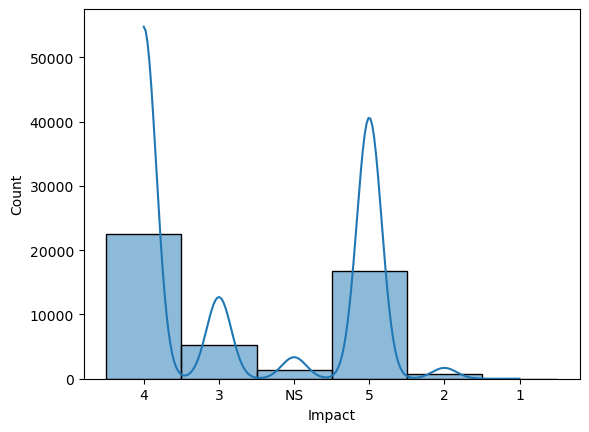

In [31]:
# ploting the histogram
sns.histplot(x =data.Impact,kde = True)

## observation
- the distribution show a presence of outliers and the distribution is multimodal 
- since the data is behaving as discreate we will replcace the null values with mode

<Axes: xlabel='Impact', ylabel='count'>

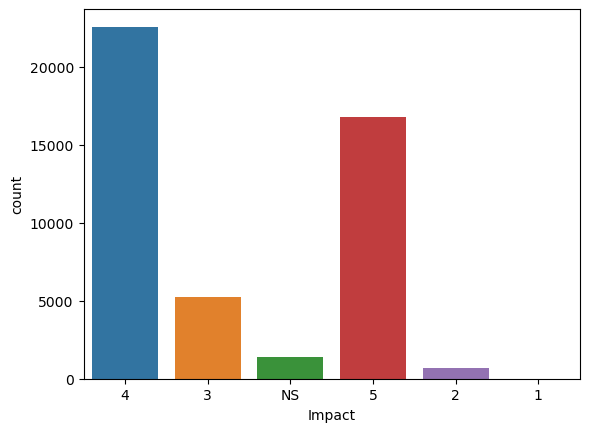

In [32]:
sns.countplot(x=data.Impact)

In [33]:
data['Impact'] = data.Impact.replace('NS',np.nan)

In [34]:
data.loc[data.Impact.isnull() == True,'Impact'] = '4'

In [35]:
# converting the object data type to int 
data['Impact'] = data.Impact.astype(int)

In [36]:
data.Urgency.unique()

array(['4', '3', '5', '2', '1', '5 - Very Low'], dtype=object)

<Axes: xlabel='Urgency', ylabel='Count'>

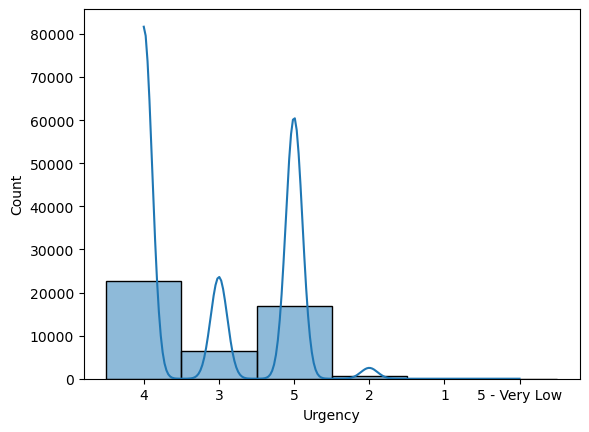

In [37]:
sns.histplot(x =data.Urgency,kde = True)

## observation:
- data distribution seems to be multimodel and also has some outliers 

<Axes: xlabel='Urgency', ylabel='count'>

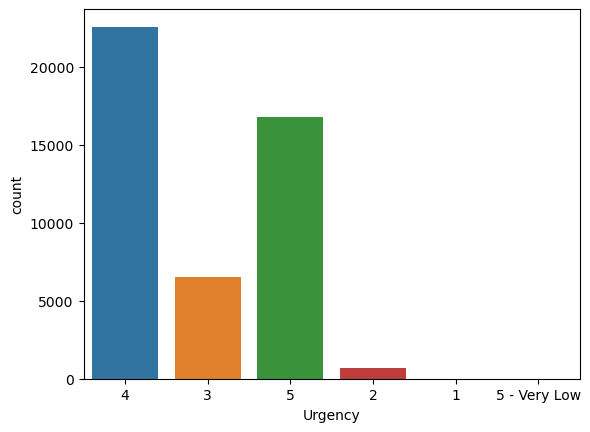

In [38]:
sns.countplot(x = data.Urgency)

In [39]:
# replacing the '5 - verylow with 5'
data['Urgency']= data.Urgency.replace('5 - Very Low','5')

In [40]:
# converting the obect to int datatype
data['Urgency']=data.Urgency.astype(int)

In [41]:
data.Priority.unique()

array(['4', '3', 'NA', '5', '2', '1'], dtype=object)

In [42]:
data.Priority.mode()

0    4
Name: Priority, dtype: object

In [43]:
# replcing the NA values with mode
data.loc[data.Priority == 'NA','Priority'] = '4'

In [44]:
# converting into int datatype
data['Priority'] = data.Priority.astype(int)

In [45]:
data.number_cnt.unique()

array(['0.601292279', '0.415049969', '0.517551335', ..., '0.917466294',
       '0.701278158', '0.902319509'], dtype=object)

In [46]:
data['number_cnt']=data.number_cnt.astype(float)

In [47]:
data.No_of_Reassignments.unique()

array(['26', '33', '3', '13', '2', '4', '5', '6', '8', '17', '1', '7',
       '12', '0', '11', '9', '25', '30', '15', '37', '32', '22', '10',
       '21', '19', '14', '46', '18', '16', '42', '23', '39', '20', '45',
       '38', '24', '34', '29', '27', '31', nan, '36'], dtype=object)

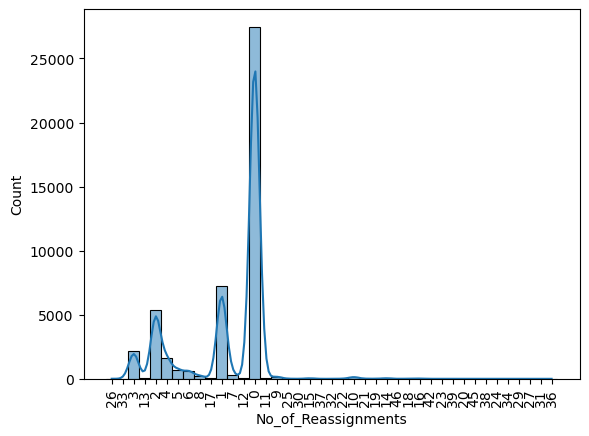

In [48]:
sns.histplot(x = data.No_of_Reassignments,kde = True)
plt.xticks (rotation= 90)
plt.show()

<Axes: xlabel='No_of_Reassignments', ylabel='count'>

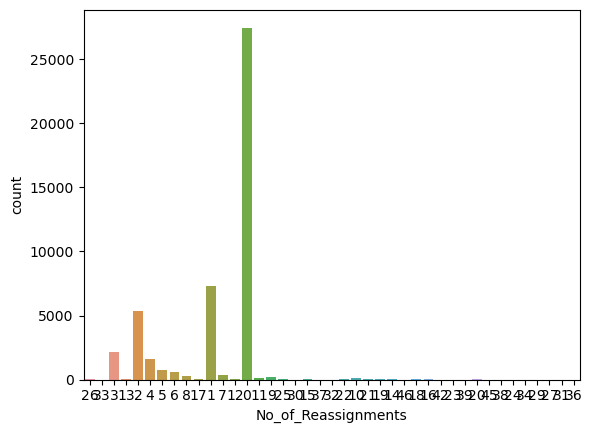

In [49]:
sns.countplot(x = data.No_of_Reassignments)

In [50]:
data.No_of_Reassignments.mode()

0    0
Name: No_of_Reassignments, dtype: object

In [51]:
# replacing the nan values with mode
data.loc[data.No_of_Reassignments.isnull()== True,'No_of_Reassignments'] = '0'

In [52]:
# converting to int datatype
data['No_of_Reassignments'] = data.No_of_Reassignments.astype(int)

In [53]:
data.No_of_Related_Interactions.unique()

array(['1', '2', '3', '14', '7', '4', '5', '370', '9', '11', '54', nan,
       '288', '34', '44', '39', '12', '42', '6', '8', '28', '29', '13',
       '18', '20', '15', '31', '88', '30', '41', '74', '16', '24', '17',
       '57', '33', '10', '118', '45', '55', '40', '19', '22', '23', '37',
       '26', '43', '25', '27', '21'], dtype=object)

In [54]:
data.No_of_Related_Interactions.mode()

0    1
Name: No_of_Related_Interactions, dtype: object

In [55]:
data.loc [data.No_of_Related_Interactions.isnull() == True,'No_of_Related_Interactions']= '1'

In [56]:
# converting the data int datatype
data['No_of_Related_Interactions'] = data.No_of_Related_Interactions.astype(int)

# EDA 

# univariate analysis

In [ ]:
import sweetviz as sv

In [ ]:
analyze = sv.analyze(data)
analyze.show_html()

# Bivariate analysis

<Axes: xlabel='Impact', ylabel='Urgency'>

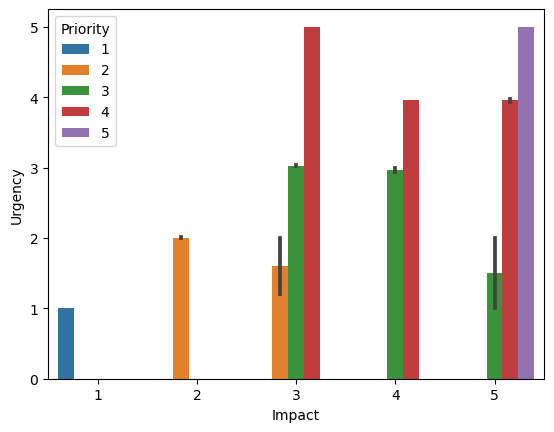

In [57]:
# ploting the Impact with urgency based on the priority
sns.barplot(x = data.Impact,y = data.Urgency,hue = data.Priority)

# insights:
    
Priority 1:

Incidents with priority 1 have an impact level of 1 and an urgency level of approximately 1.

Priority 2:

Incidents with priority 2 have an impact level of 2 and an urgency level of approximately 2.

Priority 3:

Incidents with priority 3 have an impact level of 3 and an urgency level slightly above 2.

Priority 4:

Incidents with priority 4 have impact levels of 4 and 5, both with an urgency level of 3.

Priority 5:

Incidents with priority 5 have an impact level of 5 and an urgency level slightly above 3.
General Observations:



# observation:
    
As the impact level increases, the urgency level also tends to increase, indicating a positive correlation between impact and urgency.
Higher priority levels (4 and 5) are associated with higher impact and urgency, which is expected as more critical incidents would typically require more urgent attention.

<Axes: xlabel='Category', ylabel='No_of_Reassignments'>

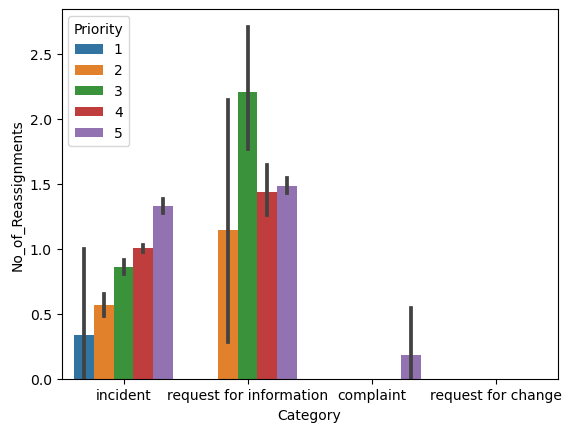

In [58]:
# ploting the category with no of reassignment based on the priority
sns.barplot(x= data.Category ,y = data.No_of_Reassignments,hue = data.Priority)

In [59]:
data.Category.unique()

array(['incident', 'request for information', 'complaint',
       'request for change'], dtype=object)

<Axes: xlabel='Category', ylabel='Urgency'>

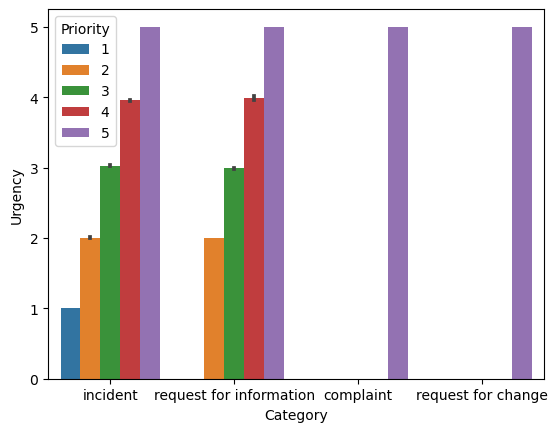

In [60]:
sns.barplot(x = data.Category,y = data.Urgency,hue = data.Priority)

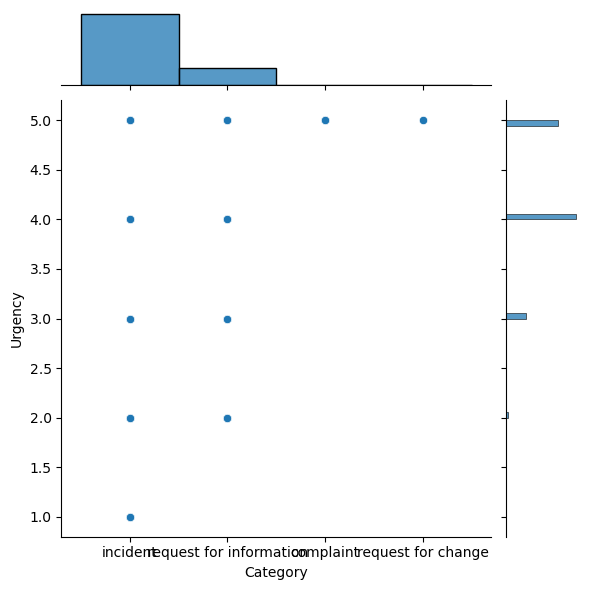

In [61]:
sns.jointplot(x = data.Category,y = data.Urgency)

# Data preprocessing

In [62]:
new_data = data.copy()

In [63]:
# checking for the null values
new_data.isnull().sum()

CI_Name                           0
CI_Cat                          111
CI_Subcat                       111
WBS                               0
Status                            0
Impact                            0
Urgency                           0
Priority                          0
number_cnt                        0
Category                          0
KB_number                         0
Alert_Status                      0
No_of_Reassignments               0
Open_Time                         0
Reopen_Time                   44322
Resolved_Time                  1780
Close_Time                        0
Handle_Time_hrs                   1
Closure_Code                    460
No_of_Related_Interactions        0
Related_Interaction               0
No_of_Related_Incidents       45384
No_of_Related_Changes         46046
Related_Change                46046
dtype: int64

In [64]:
# getting the percentage of null values
null_value_per = new_data.isnull().mean()*100
null_value_per

CI_Name                        0.000000
CI_Cat                         0.238167
CI_Subcat                      0.238167
WBS                            0.000000
Status                         0.000000
Impact                         0.000000
Urgency                        0.000000
Priority                       0.000000
number_cnt                     0.000000
Category                       0.000000
KB_number                      0.000000
Alert_Status                   0.000000
No_of_Reassignments            0.000000
Open_Time                      0.000000
Reopen_Time                   95.099343
Resolved_Time                  3.819251
Close_Time                     0.000000
Handle_Time_hrs                0.002146
Closure_Code                   0.986997
No_of_Related_Interactions     0.000000
Related_Interaction            0.000000
No_of_Related_Incidents       97.378020
No_of_Related_Changes         98.798438
Related_Change                98.798438
dtype: float64

In [65]:
# droping the features thats has more than 25% of null values
new_data.drop(['Related_Change','No_of_Related_Changes','Closure_Code','No_of_Related_Incidents'],axis = 1,inplace = True)

In [66]:
new_data.drop('Reopen_Time',axis = 1,inplace = True)

In [67]:
new_data.isnull().sum()

CI_Name                          0
CI_Cat                         111
CI_Subcat                      111
WBS                              0
Status                           0
Impact                           0
Urgency                          0
Priority                         0
number_cnt                       0
Category                         0
KB_number                        0
Alert_Status                     0
No_of_Reassignments              0
Open_Time                        0
Resolved_Time                 1780
Close_Time                       0
Handle_Time_hrs                  1
No_of_Related_Interactions       0
Related_Interaction              0
dtype: int64

In [68]:
new_data.CI_Cat.mode()

0    application
Name: CI_Cat, dtype: object

In [69]:
new_data.CI_Subcat.mode()

0    Server Based Application
Name: CI_Subcat, dtype: object

In [70]:
new_data.Resolved_Time.unique()

array(['2013-11-04T13:50:00.000000000', '2013-12-02T12:36:00.000000000',
       '2014-01-13T15:12:00.000000000', ...,
       '2014-03-31T15:29:00.000000000', '2014-03-31T15:42:00.000000000',
       '2014-03-31T22:47:00.000000000'], dtype='datetime64[ns]')

In [71]:
new_data.Resolved_Time.value_counts()

2013-10-10 12:53:00    7
2013-11-06 05:12:00    6
2013-12-16 09:47:00    6
2014-03-10 09:41:00    6
2014-03-31 09:20:00    6
                      ..
2013-12-02 09:20:00    1
2013-12-02 13:01:00    1
2013-12-02 08:37:00    1
2013-12-10 17:00:00    1
2014-03-31 22:47:00    1
Name: Resolved_Time, Length: 33627, dtype: int64

In [72]:
new_data.Handle_Time_hrs.mode()

0    0.0
Name: Handle_Time_hrs, dtype: float64

In [73]:
# replacing the null values with the mode
new_data.loc[new_data.CI_Cat.isnull() == True,'CI_Cat'] = 'application'
new_data.loc[new_data.CI_Subcat.isnull() == True,'CI_Subcat'] = ' Server Based Application' 
new_data.loc[new_data.Resolved_Time.isnull() == True,'Resolved_Time'] = '2013-10-10 12:53:00'
new_data.loc[new_data.Handle_Time_hrs.isnull() == True,'Handle_Time_hrs'] = 0.0

In [74]:
new_data.isnull().sum() # every null value has been handled

CI_Name                       0
CI_Cat                        0
CI_Subcat                     0
WBS                           0
Status                        0
Impact                        0
Urgency                       0
Priority                      0
number_cnt                    0
Category                      0
KB_number                     0
Alert_Status                  0
No_of_Reassignments           0
Open_Time                     0
Resolved_Time                 0
Close_Time                    0
Handle_Time_hrs               0
No_of_Related_Interactions    0
Related_Interaction           0
dtype: int64

In [75]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   CI_Name                     46606 non-null  object        
 1   CI_Cat                      46606 non-null  object        
 2   CI_Subcat                   46606 non-null  object        
 3   WBS                         46606 non-null  object        
 4   Status                      46606 non-null  object        
 5   Impact                      46606 non-null  int32         
 6   Urgency                     46606 non-null  int32         
 7   Priority                    46606 non-null  int32         
 8   number_cnt                  46606 non-null  float64       
 9   Category                    46606 non-null  object        
 10  KB_number                   46606 non-null  object        
 11  Alert_Status                46606 non-null  object    

In [76]:
data.select_dtypes('object')

,CI_Name,CI_Cat,CI_Subcat,WBS,Status,Category,KB_number,Alert_Status,Closure_Code,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,Closed,incident,KM0000553,closed,Other,SD0000007,2,NaN,NaN
1,WBA000124,application,Web Based Application,WBS000088,Closed,incident,KM0000611,closed,Software,SD0000011,1,NaN,NaN
2,DTA000024,application,Desktop Application,WBS000092,Closed,request for information,KM0000339,closed,No error - works as designed,SD0000017,NaN,NaN,NaN
3,WBA000124,application,Web Based Application,WBS000088,Closed,incident,KM0000611,closed,Operator error,SD0000025,NaN,NaN,NaN
4,WBA000124,application,Web Based Application,WBS000088,Closed,incident,KM0000611,closed,Other,SD0000029,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46601,SBA000464,application,Server Based Application,WBS000073,Closed,incident,KM0001314,closed,Other,SD0147021,NaN,NaN,NaN
46602,SBA000461,application,Server Based Application,WBS000073,Closed,incident,KM0002360,closed,User error,SD0146967,NaN,NaN,NaN
46603,LAP000019,computer,Laptop,WBS000091,Closed,incident,KM0000315,closed,Hardware,SD0146982,NaN,NaN,NaN
46604,WBA000058,application,Web Based Application,WBS000073,Closed,incident,KM0001287,closed,Software,SD0146986,NaN,NaN,NaN


In [77]:
# conversion of categorical columns to numarical columns

# upon analysing the categorical data thers is no hierachy in categories so we will replace all the categorical column with label encoder

# importing the label encoder
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

for i in new_data.select_dtypes('object'):
    new_data[i]=lb.fit_transform(new_data[i])

In [78]:
new_data.info() # converted all categorical to numarical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   CI_Name                     46606 non-null  int32         
 1   CI_Cat                      46606 non-null  int32         
 2   CI_Subcat                   46606 non-null  int32         
 3   WBS                         46606 non-null  int32         
 4   Status                      46606 non-null  int32         
 5   Impact                      46606 non-null  int32         
 6   Urgency                     46606 non-null  int32         
 7   Priority                    46606 non-null  int32         
 8   number_cnt                  46606 non-null  float64       
 9   Category                    46606 non-null  int32         
 10  KB_number                   46606 non-null  int32         
 11  Alert_Status                46606 non-null  int32     

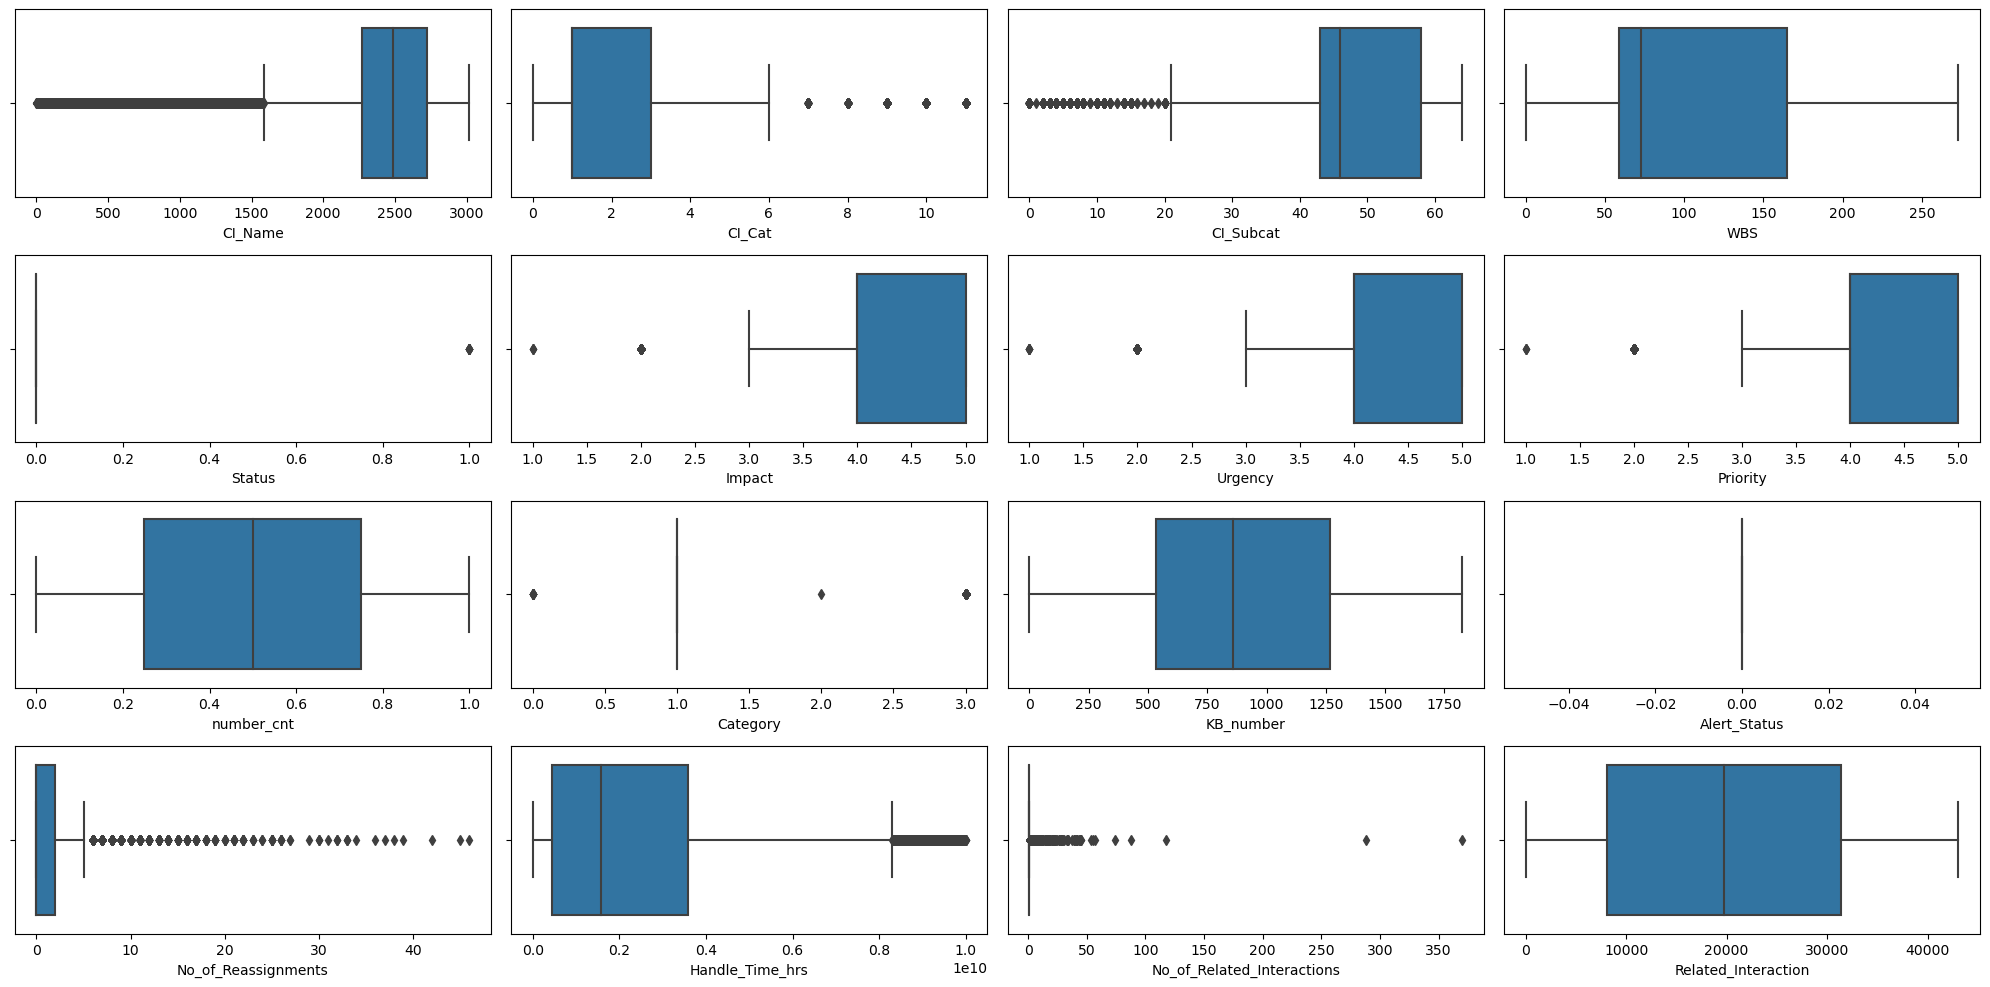

In [79]:
# checking for the outlier
plt.figure(figsize =(20,12))
plot=1

for i in new_data.drop(['Open_Time','Resolved_Time','Close_Time'],axis = 1):
    plt.subplot(5,4,plot)
    sns.boxplot(x = new_data[i])
    plot+=1
plt.tight_layout()

# feature selection

In [80]:
new_data.drop('Alert_Status',axis = 1,inplace = True)

<Axes: >

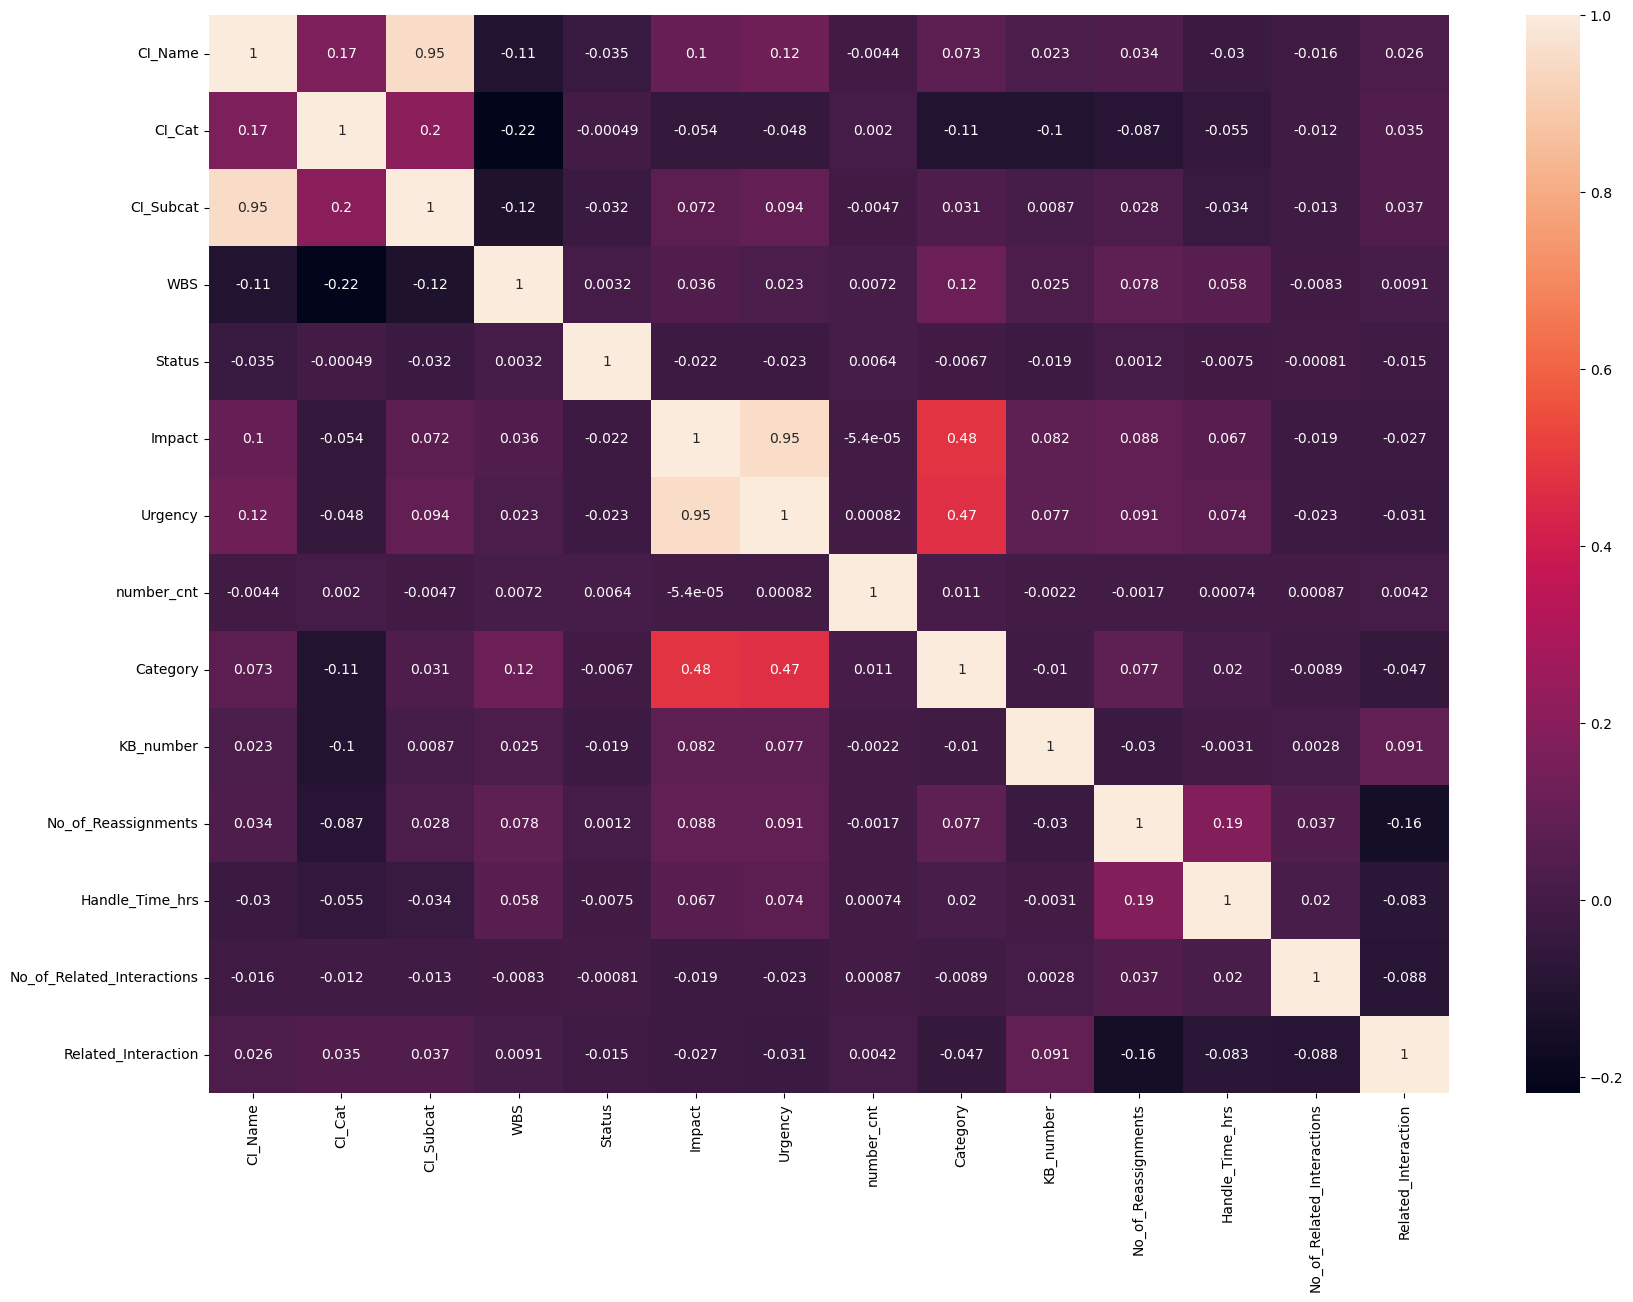

In [81]:
plt.figure(figsize = (20,14))
sns.heatmap(new_data.drop('Priority',axis = 1).corr(),annot = True)

In [82]:
# **Insights:** Upon examining the correlation between columns through heatmap visualization, it was evident that only the categorical columns, specifically "CI_Subcat" and "CI_Name," exhibited a substantial correlation of around 95%. Notably, this correlation was observed without making any alterations to the dataset.

In [83]:
X = new_data.drop(['Priority','Open_Time','Resolved_Time','Close_Time'],axis = 1)
Y= new_data.Priority

In [84]:
# applying the chi-square test for feature selection
from sklearn.feature_selection import chi2,SelectKBest

chi_square = SelectKBest(chi2,k=6)
chi_square.fit_transform(X,Y)
final_feature = chi_square.get_support(indices= True)
print(X.columns[final_feature])

Index(['CI_Name', 'CI_Subcat', 'WBS', 'KB_number', 'Handle_Time_hrs',
       'Related_Interaction'],
      dtype='object')


In [167]:
# applying the variance threshold 
from sklearn.feature_selection import VarianceThreshold

vr = VarianceThreshold(threshold=0.2)
vr.fit_transform(X,Y)
best_feature = vr.get_support(indices = True)
print(X.columns[best_feature])

Index(['CI_Name', 'CI_Cat', 'CI_Subcat', 'WBS', 'Impact', 'Urgency',
       'Category', 'KB_number', 'No_of_Reassignments', 'Handle_Time_hrs',
       'No_of_Related_Interactions', 'Related_Interaction'],
      dtype='object')


In [86]:
# applying the lasso regression for feature selection
from sklearn.linear_model import Lasso
ls  = Lasso()
ls.fit(X,Y)
print('best_columns',X.columns[ls.coef_ != 0])

best_columns Index(['CI_Name', 'WBS', 'KB_number', 'Handle_Time_hrs',
       'Related_Interaction'],
      dtype='object')


# 1. Predicting High Priority Tickets: To predict priority 1 & 2 tickets, so 
# that they can take preventive measures or fix the problem before 
# it surfaces.

In [147]:
# adding the priority 1 and 2 as high priority and remaining all in other less_priority

#changing the values as per project requirement 
new_data.Priority.replace({ 1:'high_priority',2:'high_priority',
                     3:'Less_Priority',4:'Less_Priority',5:'Less_Priority'},inplace = True)

In [186]:
# labelecoding the priority values as (high_priority = 0) and (less_priority =1)
new_data['Priority']=lb.fit_transform(new_data.Priority)

In [187]:
# considering the feature which have variance more than 0.1 throught feature selection method
x = new_data[['CI_Name', 'CI_Cat', 'CI_Subcat', 'WBS', 'Impact', 'Urgency',
       'Category', 'KB_number', 'No_of_Reassignments', 'Handle_Time_hrs',
       'No_of_Related_Interactions', 'Related_Interaction']]

In [188]:
y = new_data.Priority

In [189]:
# spliting the dataset for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(34954, 12)
(34954,)
(11652, 12)
(11652,)


In [190]:
# importing the necessary models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# import the necessary evaluation metrics 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
# importing the scaling technique
from sklearn.preprocessing import StandardScaler
# importing the pipeline
from sklearn.pipeline import Pipeline

In [199]:
# creating pipelines for each classifier
pipelines = {
    'logistic_regression': Pipeline([
        ('classifier', LogisticRegression())
    ]),
    'random_forest': Pipeline([
        ('classifier', RandomForestClassifier())
    ]),
    'svm': Pipeline([
        ('classifier', SVC())
    ]),
    'XGBClassifier': Pipeline([
        ('classifier', XGBClassifier())
    ])
}
# Training and evaluating each pipeline
results = {}
for name, pipeline in pipelines.items():
    pipeline.fit(x_train, y_train)
    y_pred = pipeline.predict(x_test)
    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred),
        'confusion_matrix' : confusion_matrix(y_test,y_pred)
    }

# Display results
for name, result in results.items():
    print(f"Results for {name}:")
    print(f"Accuracy: {result['accuracy']}")
    print("Classification Report:")
    print(result['classification_report'])
    print('confusion_matrix')
    print(result['confusion_matrix'])
    print("=" * 30)
    


Results for logistic_regression:
Accuracy: 0.9842087195331274
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     11468
           1       0.00      0.00      0.00       184

    accuracy                           0.98     11652
   macro avg       0.49      0.50      0.50     11652
weighted avg       0.97      0.98      0.98     11652

confusion_matrix
[[11468     0]
 [  184     0]]
Results for random_forest:
Accuracy: 0.9998283556470993
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11468
           1       0.99      1.00      0.99       184

    accuracy                           1.00     11652
   macro avg       0.99      1.00      1.00     11652
weighted avg       1.00      1.00      1.00     11652

confusion_matrix
[[11466     2]
 [    0   184]]
Results for svm:
Accuracy: 0.9842087195331274
Classification Report:
              pre

## model summary:
    
I have performed the various model like logistic regression ,support vector machine ,random forest ,xgboost ,among the 
models the random forest classifier outperfomed other model but when its comes to predicton the random forest classifier ,
is the best model among the models

## Problem 2. Forecast the incident volume in different fields , quarterly and annual. So that they can be better prepared with resources and technology planning.

In [245]:
# we have opted two columns to do the forecating
forecast = df[['Incident_ID','Open_Time']]

In [246]:
forecast

,Incident_ID,Open_Time
0,IM0000004,05-02-2012 13:32
1,IM0000005,12-03-2012 15:44
2,IM0000006,29-03-2012 12:36
3,IM0000011,17-07-2012 11:49
4,IM0000012,10-08-2012 11:01
...,...,...
46601,IM0047053,31-03-2014 16:23
46602,IM0047054,31-03-2014 15:03
46603,IM0047055,31-03-2014 15:28
46604,IM0047056,31-03-2014 15:35


In [247]:
# Convert the 'Open_Time' column to datetime format using the specified date and time format ("%d-%m-%Y %H:%M").
forecast.loc[:,'Open_Time']=pd.to_datetime(forecast.Open_Time,format="%d-%m-%Y %H:%M")

In [248]:
Open_Time=forecast.Open_Time

In [249]:
Open_Time

0       2012-02-05 13:32:00
1       2012-03-12 15:44:00
2       2012-03-29 12:36:00
3       2012-07-17 11:49:00
4       2012-08-10 11:01:00
                ...        
46601   2014-03-31 16:23:00
46602   2014-03-31 15:03:00
46603   2014-03-31 15:28:00
46604   2014-03-31 15:35:00
46605   2014-03-31 17:24:00
Name: Open_Time, Length: 46606, dtype: datetime64[ns]

In [250]:
# Extracting date components (day, month, year) from the 'Open_Time' values and storing them in separate lists.
date=[]
day=[]
month=[]
year=[]
for x in Open_Time:
    date.append(x.date())
    day.append(x.day)
    month.append(x.month)
    year.append(x.year)

In [251]:
forecast.loc[:,'date']=date
forecast.loc[:,'day']=day
forecast.loc[:,'month']=month
forecast.loc[:,'year']=year

In [252]:
forecast

,Incident_ID,Open_Time,date,day,month,year
0,IM0000004,2012-02-05 13:32:00,2012-02-05,5,2,2012
1,IM0000005,2012-03-12 15:44:00,2012-03-12,12,3,2012
2,IM0000006,2012-03-29 12:36:00,2012-03-29,29,3,2012
3,IM0000011,2012-07-17 11:49:00,2012-07-17,17,7,2012
4,IM0000012,2012-08-10 11:01:00,2012-08-10,10,8,2012
...,...,...,...,...,...,...
46601,IM0047053,2014-03-31 16:23:00,2014-03-31,31,3,2014
46602,IM0047054,2014-03-31 15:03:00,2014-03-31,31,3,2014
46603,IM0047055,2014-03-31 15:28:00,2014-03-31,31,3,2014
46604,IM0047056,2014-03-31 15:35:00,2014-03-31,31,3,2014


In [253]:
forecast.drop('Open_Time',axis=1,inplace=True)

In [254]:
final_df=forecast[['date','Incident_ID']]

In [255]:
final_df

,date,Incident_ID
0,2012-02-05,IM0000004
1,2012-03-12,IM0000005
2,2012-03-29,IM0000006
3,2012-07-17,IM0000011
4,2012-08-10,IM0000012
...,...,...
46601,2014-03-31,IM0047053
46602,2014-03-31,IM0047054
46603,2014-03-31,IM0047055
46604,2014-03-31,IM0047056


In [256]:
final_df.date.info()

<class 'pandas.core.series.Series'>
RangeIndex: 46606 entries, 0 to 46605
Series name: date
Non-Null Count  Dtype 
--------------  ----- 
46606 non-null  object
dtypes: object(1)
memory usage: 364.2+ KB


In [257]:
# convert it to datetime datatype
final_df.date=final_df.date.astype('datetime64[ns]')

In [258]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         46606 non-null  datetime64[ns]
 1   Incident_ID  46606 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 728.3+ KB


In [259]:
# Creating a pivot table on 'date' column to count the occurrences of 'Incident_ID' in the 'final_df' dataframe.
final_df=final_df.pivot_table(index='date',values='Incident_ID',aggfunc='count')
final_df

,Incident_ID
date,
2012-02-05,1
2012-03-12,1
2012-03-29,1
2012-07-17,1
2012-08-10,2
...,...
2014-03-27,269
2014-03-28,205
2014-03-29,5


In [260]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 331 entries, 2012-02-05 to 2014-03-31
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Incident_ID  331 non-null    int64
dtypes: int64(1)
memory usage: 5.2 KB


In [261]:
final_df.tail()

,Incident_ID
date,
2014-03-27,269
2014-03-28,205
2014-03-29,5
2014-03-30,3
2014-03-31,217


<Axes: xlabel='date'>

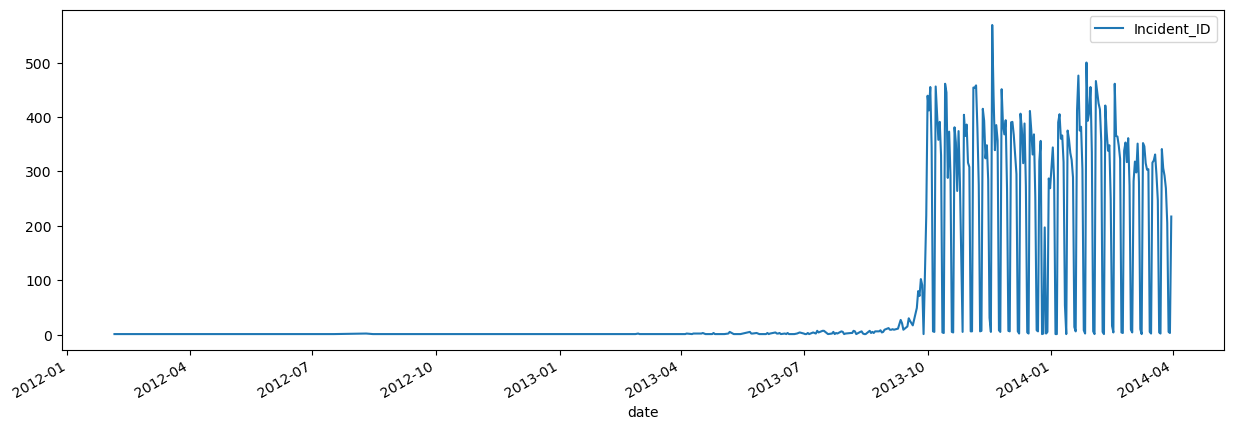

In [262]:
final_df.plot(figsize=(15,5))

 In the time frame spanning from January 2012 to July 2013, the graph displays an absence of distinguishable waves or patterns. Nevertheless, starting from October 2013 to April 2014, a distinct seasonal pattern becomes evident in the data. Therefore, we have opted to move forward with the range from October 2013 to April 2014 for both training and testing purposes.

<Axes: xlabel='date'>

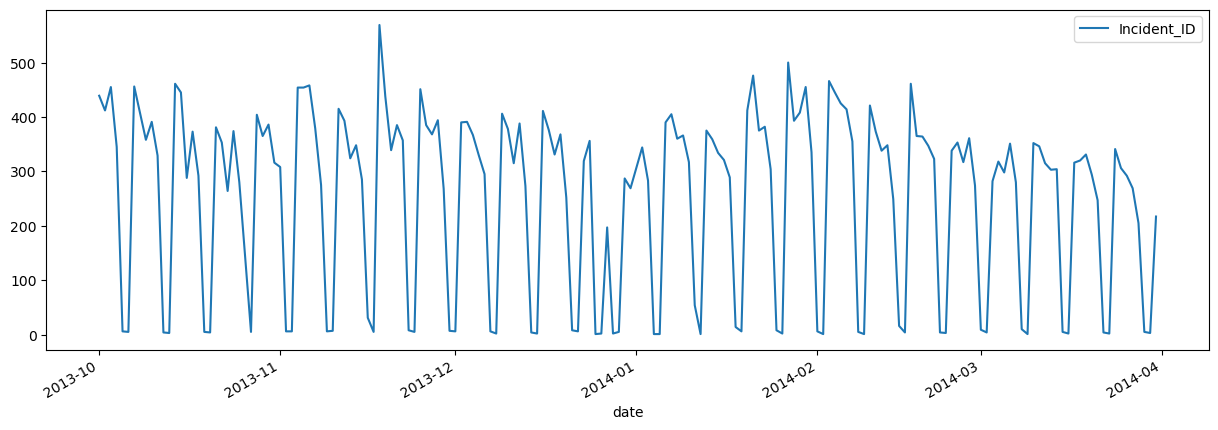

In [265]:
final_df.loc['2013-10':,:].plot(figsize=(15,5))

Figure(640x480)


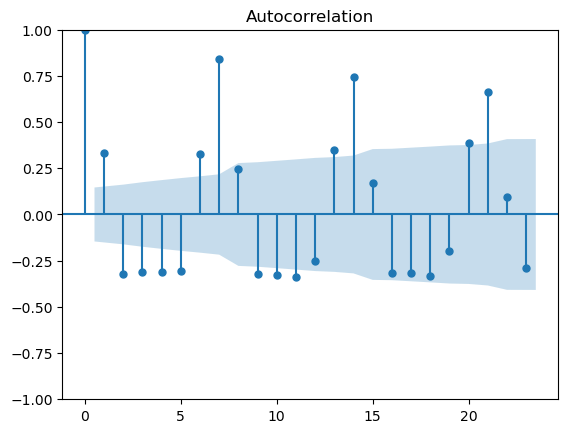

In [266]:
# checking for the stationarity of the data
from statsmodels.graphics.tsaplots import plot_acf

print(plot_acf(final_df.loc['2013-10':,:]))

the data looks little bit unstationarity 

In [267]:
new_forecast=final_df.loc['2013-10':,:]

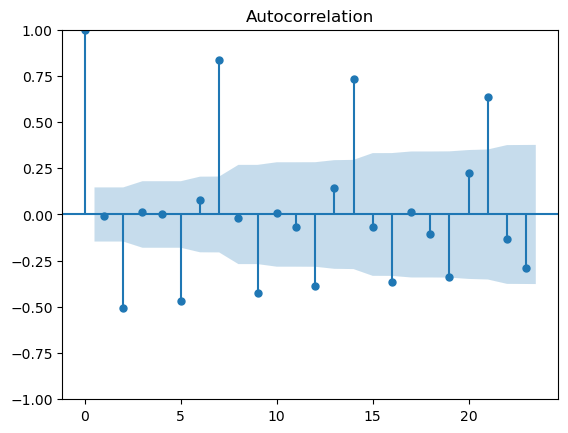

In [269]:
# making the data stationary
data_diff=new_forecast.diff(periods=1)
plot_acf(data_diff.iloc[1:,:])
plt.show()

the data become stationary

In [270]:
data_diff=data_diff.iloc[1:,:]
data_diff

,Incident_ID
date,
2013-10-02,-27.0
2013-10-03,43.0
2013-10-04,-110.0
2013-10-05,-339.0
2013-10-06,-1.0
...,...
2014-03-27,-23.0
2014-03-28,-64.0
2014-03-29,-200.0


In [271]:
data_diff.describe()

,Incident_ID
count,179.000000
mean,-1.240223
std,194.412781
min,-355.000000
25%,-78.500000
50%,-17.000000
75%,15.000000
max,564.000000


In [272]:
data_diff.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 179 entries, 2013-10-02 to 2014-03-31
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Incident_ID  179 non-null    float64
dtypes: float64(1)
memory usage: 2.8 KB


In [273]:
data_diff.isnull().sum()

Incident_ID    0
dtype: int64

In [274]:
# Resampling the DataFrame data_diff to daily frequency, summing the values, and filling missing values through linear interpolation.
data_diff=data_diff.resample('D').sum().interpolate(method='linear')

In [276]:
data_diff.size

181

In [277]:
#splitting the data into training and testing
train=data_diff[:144]
test=data_diff[144:]

# Auto regressesive model

<Axes: xlabel='date'>

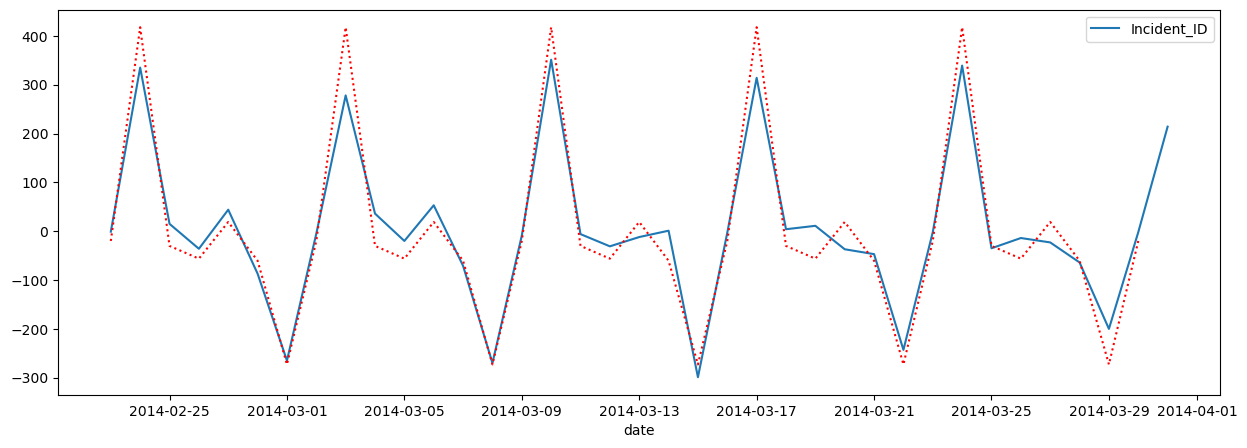

In [279]:
from statsmodels.tsa.ar_model import AutoReg
ar_model=AutoReg(train,lags=None,seasonal=True)
model=ar_model.fit()
forecast=model.forecast(steps=36)
plt.figure(figsize=(15,5))
sns.lineplot(test,color='b',linestyle='--')
sns.lineplot(forecast,color='r', linestyle=':')

In [281]:
ar_model=AutoReg(data_diff,lags=None,seasonal=True)

In [282]:
model=ar_model.fit()

In [283]:
forecast_q=model.forecast(steps=90)
forecast_y=model.forecast(steps=365)

#### prediction for quarterly

<Axes: xlabel='date'>

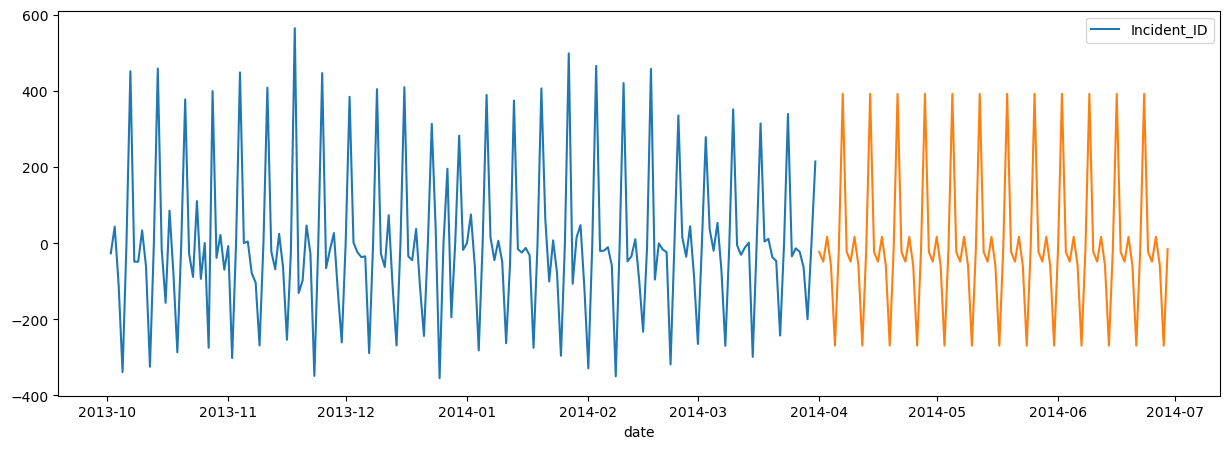

In [284]:
plt.figure(figsize=(15,5))
sns.lineplot(data_diff)
sns.lineplot(forecast_q)

#### preadiction for Annualy

<Axes: xlabel='date'>

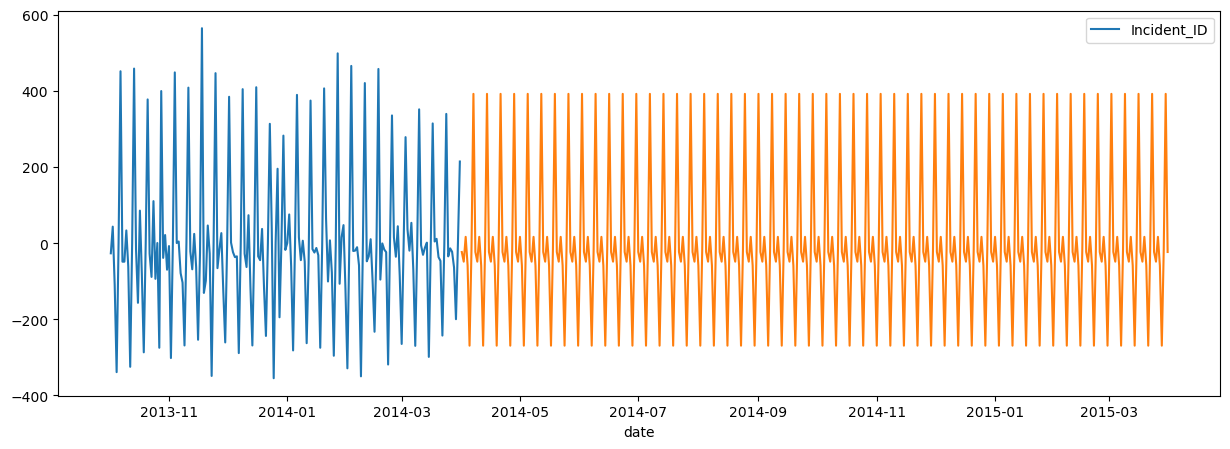

In [285]:
plt.figure(figsize=(15,5))
sns.lineplot(data_diff)
sns.lineplot(forecast_y)

## Arima model

In [286]:
from statsmodels.tsa.arima.model import ARIMA
arima_model = ARIMA(train, order=(2,1,2), freq='D')

In [287]:
arima_result = arima_model.fit()

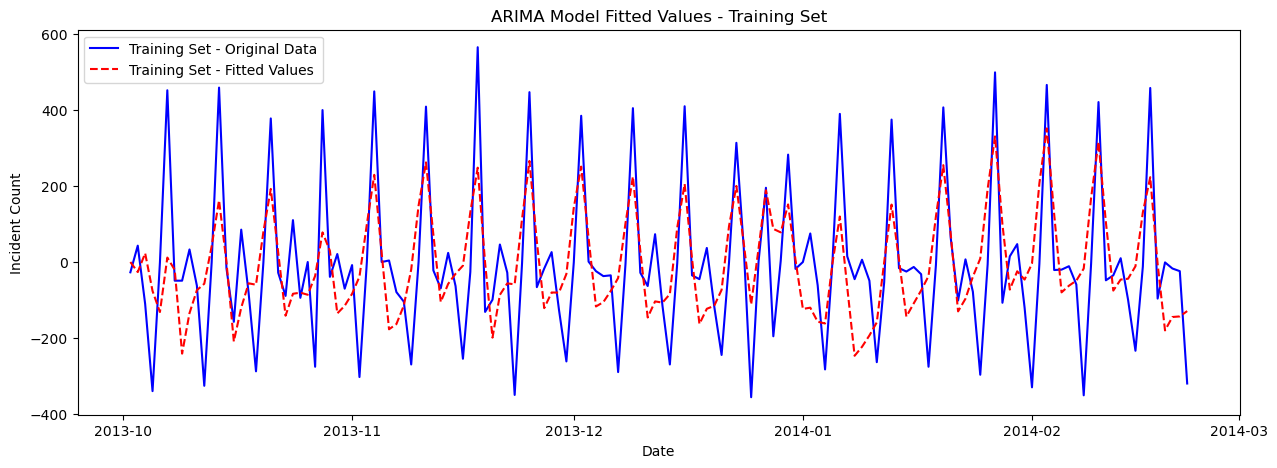

In [288]:
plt.figure(figsize=(15, 5))
plt.plot(train.index, train['Incident_ID'], label='Training Set - Original Data', color='blue')
plt.plot(train.index, arima_result.fittedvalues, label='Training Set - Fitted Values', linestyle='dashed', color='red')
plt.title('ARIMA Model Fitted Values - Training Set')
plt.xlabel('Date')
plt.ylabel('Incident Count')
plt.legend()
plt.show()

In [289]:
forecast_steps = len(test)
forecast = arima_result.forecast(steps=forecast_steps)

<Axes: xlabel='date', ylabel='predicted_mean'>

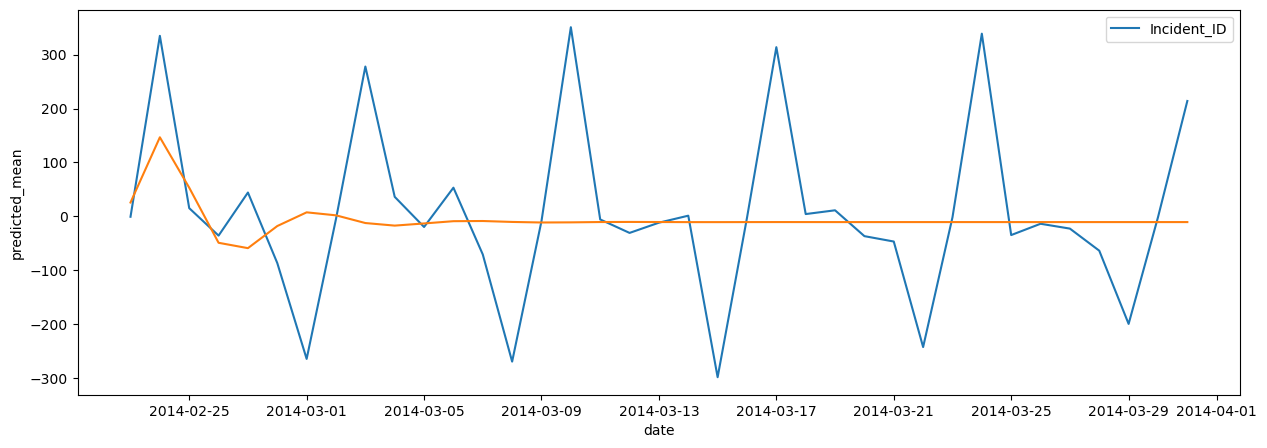

In [290]:
plt.figure(figsize=(15,5))
sns.lineplot(test)
sns.lineplot(forecast)

In [291]:
import itertools
p=d=q=range(0,5)
pdq=list(itertools.product(p,d,q))

In [292]:
import warnings
warnings.filterwarnings('ignore')
params1 = []
aic_error = []
for params in pdq:
    model_ARIMA = ARIMA(train, order=params,enforce_stationarity=False,freq='D')
    model_ARIMA_fit = model_ARIMA.fit()
    aic_error.append(model_ARIMA_fit.aic)
    params1.append(params)

In [293]:
params1[np.argmin(aic_error)]

(4, 0, 4)

In [294]:
model_arima=ARIMA(train,order=(4,0,4))

In [295]:
model=model_arima.fit()

In [296]:
forecast=model.forecast(steps=36)

<Axes: xlabel='date', ylabel='predicted_mean'>

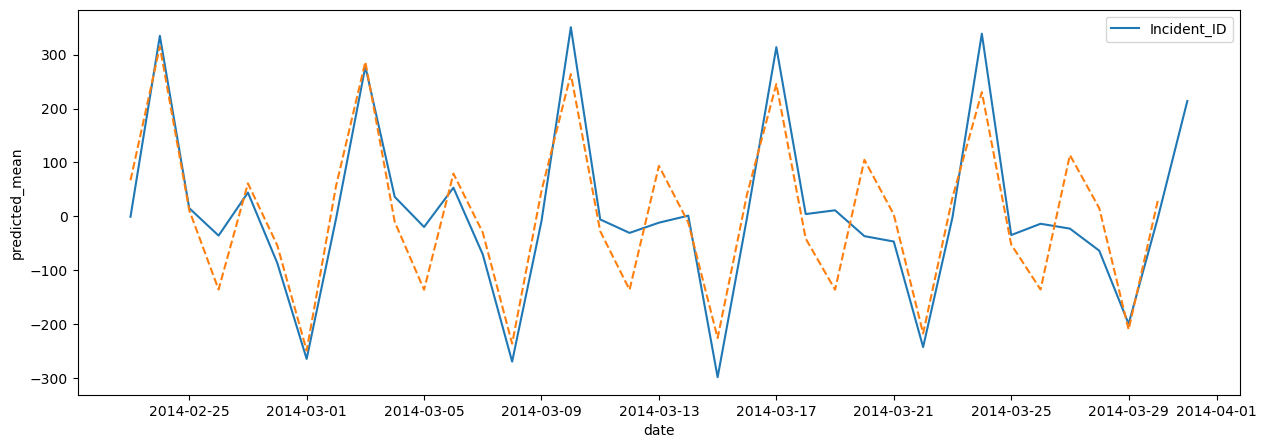

In [297]:
plt.figure(figsize=(15,5))
sns.lineplot(test)
sns.lineplot(forecast,linestyle='dashed')

In [298]:
model_arima=ARIMA(data_diff,order=(4,0,4))

In [299]:
model=model_arima.fit()

In [300]:
forecast_q=model.forecast(steps=90)
forecast_y=model.forecast(steps=365)

#### prediction for quarterly

<Axes: xlabel='date', ylabel='predicted_mean'>

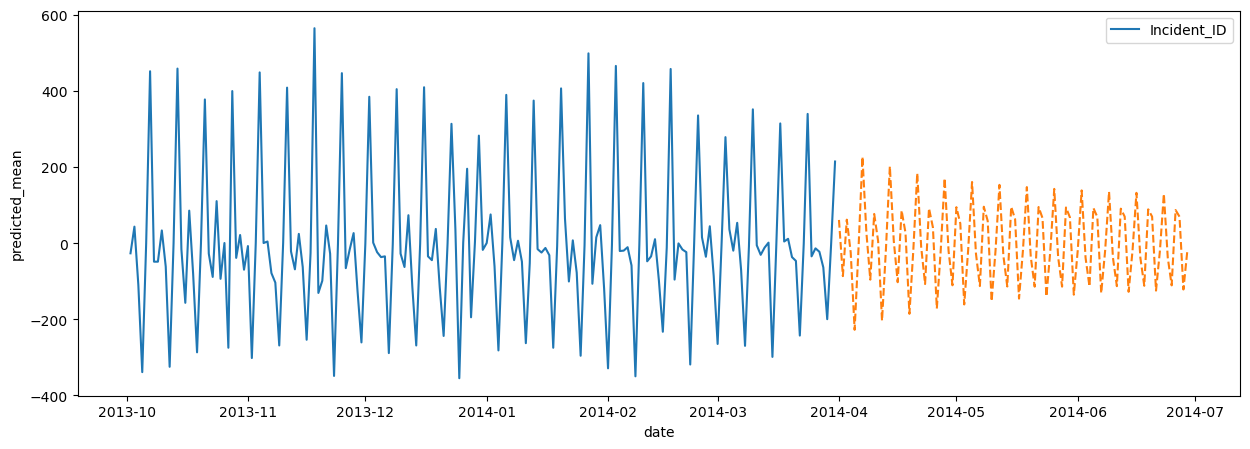

In [301]:
plt.figure(figsize=(15,5))
sns.lineplot(data_diff)
sns.lineplot(forecast_q,linestyle='dashed')

#### prediction for Annually

<Axes: xlabel='date', ylabel='predicted_mean'>

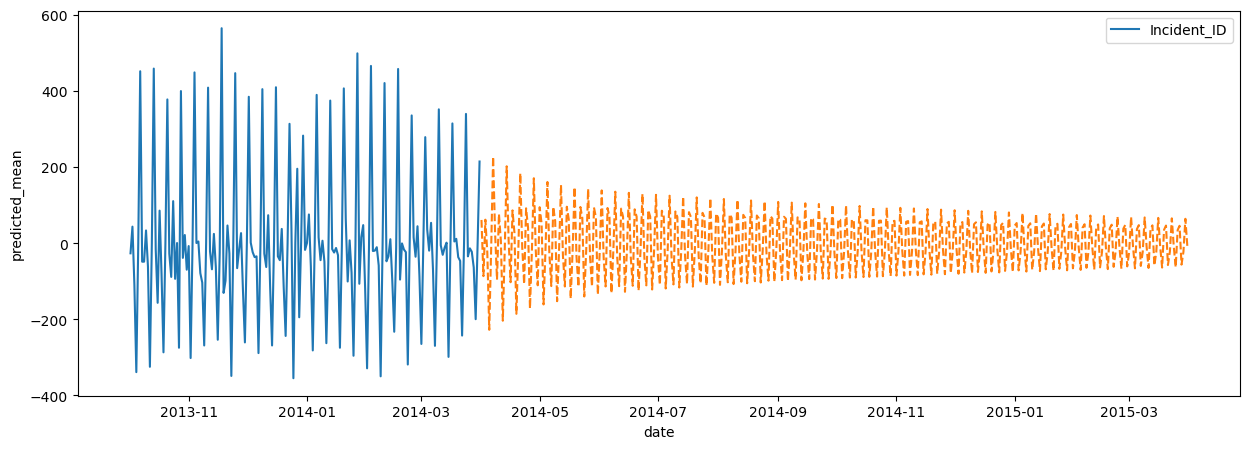

In [303]:
plt.figure(figsize=(15,5))
sns.lineplot(data_diff)
sns.lineplot(forecast_y,linestyle='dashed')

# summary:
The autoregressive (AR) and ARIMA time series model effectively forecasts quarterly and annual incident volumes in various fields. Through rigorous testing, the model has demonstrated reliable performance, capturing historical patterns accurately. The forecast results align with expectations, aiding stakeholders in resource and technology planning. This approach ensures better preparedness for future incidents, enhancing organizational responsiveness and strategic planning.

# Problem 3.Auto tag the tickets with right priorities and right departments so that reassigning and related delay can be reduced.

for these probem statement we will considet the category feature as output

In [310]:
x = new_data[['CI_Name', 'CI_Cat', 'CI_Subcat', 'WBS', 'Impact', 'Urgency',
       'Category', 'KB_number', 'No_of_Reassignments', 'Handle_Time_hrs',
       'No_of_Related_Interactions', 'Related_Interaction']]

In [311]:
df.Category.unique()

array(['incident', 'request for information', 'complaint',
       'request for change'], dtype=object)

In [312]:
new_data.Category.unique()

array([1, 3, 0, 2])

In [313]:
y = new_data.Category

In [314]:
# spliting the dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(34954, 12)
(34954,)
(11652, 12)
(11652,)


In [315]:
# creating pipelines for each classifier
pipelines = {
    'logistic_regression': Pipeline([
        ('classifier', LogisticRegression())
    ]),
    'random_forest': Pipeline([
        ('classifier', RandomForestClassifier())
    ]),
    'svm': Pipeline([
        ('classifier', SVC())
    ]),
    'XGBClassifier': Pipeline([
        ('classifier', XGBClassifier())
    ])
}
# Training and evaluating each pipeline
results = {}
for name, pipeline in pipelines.items():
    pipeline.fit(x_train, y_train)
    y_pred = pipeline.predict(x_test)
    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred),
        'confusion_matrix' : confusion_matrix(y_test,y_pred)
    }

# Display results
for name, result in results.items():
    print(f"Results for {name}:")
    print(f"Accuracy: {result['accuracy']}")
    print("Classification Report:")
    print(result['classification_report'])
    print('confusion_matrix')
    print(result['confusion_matrix'])
    print("=" * 30)
    

Results for logistic_regression:
Accuracy: 0.8104188122210779
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.81      1.00      0.90      9443
           3       0.00      0.00      0.00      2207

    accuracy                           0.81     11652
   macro avg       0.27      0.33      0.30     11652
weighted avg       0.66      0.81      0.73     11652

confusion_matrix
[[   0    2    0]
 [   0 9443    0]
 [   0 2207    0]]
Results for random_forest:
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00      9443
           3       1.00      1.00      1.00      2207

    accuracy                           1.00     11652
   macro avg       1.00      1.00      1.00     11652
weighted avg       1.00      1.00      1.00     11652

confusion_matrix


# Problem 4:Predict RFC (Request for change) and possible failure misconfiguration of ITSM assets.

In [316]:
data.isnull().sum()

CI_Name                           0
CI_Cat                          111
CI_Subcat                       111
WBS                               0
Status                            0
Impact                            0
Urgency                           0
Priority                          0
number_cnt                        0
Category                          0
KB_number                         0
Alert_Status                      0
No_of_Reassignments               0
Open_Time                         0
Reopen_Time                   44322
Resolved_Time                  1780
Close_Time                        0
Handle_Time_hrs                   1
Closure_Code                    460
No_of_Related_Interactions        0
Related_Interaction               0
No_of_Related_Incidents       45384
No_of_Related_Changes         46046
Related_Change                46046
dtype: int64

In [332]:
new_data['No_of_Related_Changes'] =data.No_of_Related_Changes

In [340]:
new_data['Closure_Code'] = data.Closure_Code

In [341]:
rfc = new_data.dropna(subset=['No_of_Related_Changes'])

In [342]:
rfc.reset_index()

,index,CI_Name,CI_Cat,CI_Subcat,WBS,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_hrs,No_of_Related_Interactions,Related_Interaction,No_of_Related_Changes,Closure_Code
0,10,2863,1,58,70,0,4,4,0,0.439909,1,456,6,2012-09-21 12:56:00,2013-11-08 14:23:00,2013-11-08 14:23:00,3.067449e+09,1,12,1,Software
1,38,2863,1,58,70,0,3,3,0,0.481873,1,456,4,2013-03-05 13:58:00,2013-11-08 15:35:00,2013-11-08 15:35:00,2.162222e+09,1,32,2,Software
2,43,2741,11,58,137,0,3,3,0,0.695187,1,413,15,2013-03-26 12:23:00,2014-03-24 13:28:00,2014-03-24 13:28:00,1.564190e+09,2,0,1,Other
3,54,2289,1,46,145,0,5,5,0,0.283635,1,423,1,2013-04-17 09:06:00,2014-01-22 16:19:00,2014-01-22 16:20:00,2.197000e+03,1,40,1,Unknown
4,119,2654,1,48,52,0,5,5,0,0.875886,1,430,2,2013-06-26 12:09:00,2013-11-18 09:14:00,2013-11-18 09:15:00,5.237869e+09,1,89,1,Software
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,45411,990,1,11,74,0,2,3,1,0.427608,1,248,1,2014-03-25 11:56:00,2014-03-26 08:10:00,2014-03-26 08:11:00,7.169167e+09,34,0,1,Software
556,45552,2416,1,46,59,0,5,5,0,0.371645,1,1533,0,2014-03-25 14:45:00,2014-03-31 12:45:00,2014-03-31 12:46:00,3.237778e+09,1,42085,1,Software
557,45974,2741,11,58,137,0,4,4,0,0.174987,1,413,0,2014-03-27 09:57:00,2014-03-27 12:58:00,2014-03-27 12:58:00,3.016944e+09,1,42455,1,Other
558,46109,2705,11,46,59,0,4,4,0,0.424200,1,1490,0,2014-03-27 16:04:00,2014-03-28 15:59:00,2014-03-28 15:59:00,1.041806e+09,1,42618,1,Operator error


In [343]:
# encoding the closer_code
new_data['Closure_Code']= lb.fit_transform(new_data.Closure_Code)

In [344]:
x=new_data[['CI_Subcat','WBS','Priority','Category','Closure_Code','No_of_Related_Interactions','Handle_Time_hrs']]

In [347]:
y = new_data.Category

In [348]:
# spliting the dataset 
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(34954, 7)
(34954,)
(11652, 7)
(11652,)


In [349]:
# creating pipelines for each classifier
pipelines = {
    'logistic_regression': Pipeline([
        ('classifier', LogisticRegression())
    ]),
    'random_forest': Pipeline([
        ('classifier', RandomForestClassifier())
    ]),
    'svm': Pipeline([
        ('classifier', SVC())
    ]),
    'XGBClassifier': Pipeline([
        ('classifier', XGBClassifier())
    ])
}
# Training and evaluating each pipeline
results = {}
for name, pipeline in pipelines.items():
    pipeline.fit(x_train, y_train)
    y_pred = pipeline.predict(x_test)
    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred),
        'confusion_matrix' : confusion_matrix(y_test,y_pred)
    }

# Display results
for name, result in results.items():
    print(f"Results for {name}:")
    print(f"Accuracy: {result['accuracy']}")
    print("Classification Report:")
    print(result['classification_report'])
    print('confusion_matrix')
    print(result['confusion_matrix'])
    print("=" * 30)
    

Results for logistic_regression:
Accuracy: 0.8104188122210779
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.81      1.00      0.90      9443
           3       0.00      0.00      0.00      2207

    accuracy                           0.81     11652
   macro avg       0.27      0.33      0.30     11652
weighted avg       0.66      0.81      0.73     11652

confusion_matrix
[[   0    2    0]
 [   0 9443    0]
 [   0 2207    0]]
Results for random_forest:
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00      9443
           3       1.00      1.00      1.00      2207

    accuracy                           1.00     11652
   macro avg       1.00      1.00      1.00     11652
weighted avg       1.00      1.00      1.00     11652

confusion_matrix
